In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [3]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [5]:
# Value count
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
zoo["animal name"] = label_encoder.fit_transform(zoo["animal name"])

In [10]:
x = zoo.iloc[:, 1:17].values
y = zoo.iloc[:, -1].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [11]:
x.shape, y.shape

((101, 16), (101,))

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)

In [13]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = KNN_classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

In [16]:
accuracy_score(y_pred , y_test)

0.9354838709677419

In [17]:
KNN_classifier_1 = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
KNN_classifier_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [18]:
y_pred_1 = KNN_classifier_1.predict(x_test)
y_pred_1

array([1, 4, 4, 1, 1, 1, 2, 4, 1, 1, 6, 1, 2, 4, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 2, 4, 4, 4], dtype=int64)

In [19]:
cm_1 = confusion_matrix(y_pred_1, y_test)

In [20]:
accuracy_score(y_pred_1, y_test)

0.8387096774193549

In [21]:
kfold = KFold(n_splits = 5)

In [22]:
model = KNeighborsClassifier(n_neighbors = 13)
results = cross_val_score(model, x_train, y_train, cv=kfold)
results.mean()

0.6571428571428571

In [23]:
n_neighbors1 = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors1)

In [24]:
model_1 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model_1, param_grid = param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_score_)

0.97


In [26]:
grid_y_pred = grid.predict(x)

In [27]:
grid_cm = confusion_matrix(grid_y_pred, y)
grid_cm

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [28]:
accuracy_score(grid_y_pred, y)

1.0

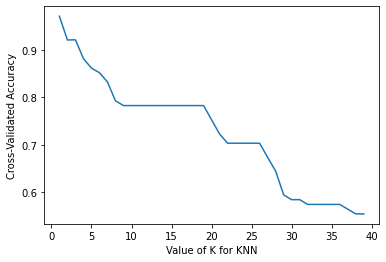

In [29]:
import matplotlib.pyplot as plt

# Choose k between 1 to 40
k_range = range(1,40)
k_scores = []

# Use iteration to calculate different k in models, then return the average based on the Cross Validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())
    
# Plot to see detailed view
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

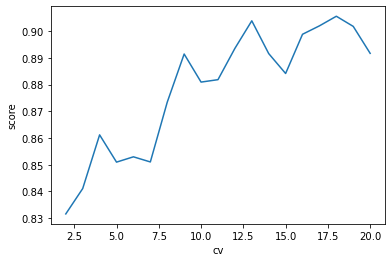

0.9055555555555556


In [30]:
# Finding the best CV Value

%matplotlib inline

k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 5)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
    
# Plot to see the detailed view
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

In [32]:
error_rate = []
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    pred_i = knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!= y_test).round(2))
print(error_rate)

[0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.1, 0.13, 0.13, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.39, 0.39, 0.39, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.48, 0.48, 0.48]


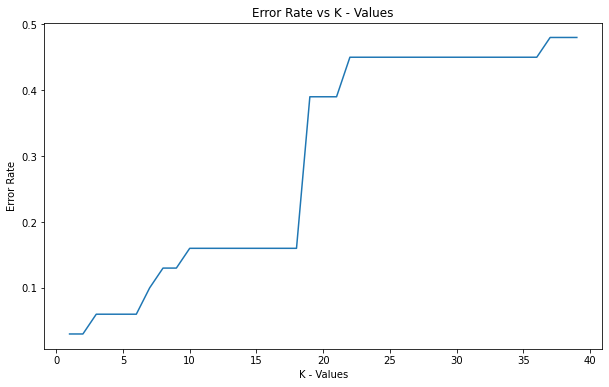

In [33]:
# Plot to see the detailed view
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K - Values')
plt.show()

In [34]:
# Grid - Search without applying Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=range(1,40))
knn_models = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn_models, param_grid = param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

In [36]:
model_2 = KNeighborsClassifier(n_neighbors = 3)
result = cross_val_score(model_2, x, y, cv=19)
print(result.mean())

0.9561403508771931


In [37]:
model_2.fit(x_train, y_train)
y_pred_1 = model_2.predict(x_test)
np.mean(y_pred_1 == y_test)

0.9354838709677419

In [38]:
model_3 = KNeighborsClassifier(n_neighbors = 7)
result_1 = cross_val_score(model_3, x, y, cv=19)
print(result_1.mean())

0.8614035087719298


In [39]:
model_3.fit(x_train, y_train)
y_pred_2 = model_3.predict(x_test)
np.mean(y_pred_2 == y_test)

0.9032258064516129

In [40]:
clf = GridSearchCV(estimator = knn_models, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

In [41]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)

col_0,1,2,3,4,5,6,7
row_0,,,,,,,
1,11,0,0,0,0,0,0
2,0,6,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,7,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,2
